<a href="https://colab.research.google.com/github/siaSim/keras_deeplearning/blob/main/Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

뉴스 기사 분류 : 다중 분류 문제

In [1]:
import matplotlib.pyplot as plt

4.2.1 로이터 데이터셋

In [2]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels)=reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire=" ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [6]:
train_labels[10]

3

4.2.2 데이터 준비

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
 results=np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  for j in sequence:
    results[i, j]=1.
 return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label]=1.
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [9]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)

4.2.3 모델 구성

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [11]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

4.2.4 훈련 검증

In [12]:
x_val = x_train[:1000]
partial_x_train =x_train[1000:]
y_val=y_train[:1000]
partial_y_train = y_train[1000:]

In [13]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 6s 190ms/step - loss: 2.7389 - accuracy: 0.4400 - val_loss: 1.8537 - val_accuracy: 0.5870
Epoch 2/20
16/16 [==============================] - 2s 157ms/step - loss: 1.5730 - accuracy: 0.6646 - val_loss: 1.4257 - val_accuracy: 0.6770
Epoch 3/20
16/16 [==============================] - 1s 71ms/step - loss: 1.2080 - accuracy: 0.7380 - val_loss: 1.2282 - val_accuracy: 0.7230
Epoch 4/20
16/16 [==============================] - 1s 83ms/step - loss: 0.9867 - accuracy: 0.7900 - val_loss: 1.1111 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 2s 154ms/step - loss: 0.8146 - accuracy: 0.8254 - val_loss: 1.0329 - val_accuracy: 0.7790
Epoch 6/20
16/16 [==============================] - 3s 157ms/step - loss: 0.6775 - accuracy: 0.8529 - val_loss: 0.9726 - val_accuracy: 0.7870
Epoch 7/20
16/16 [==============================] - 2s 108ms/step - loss: 0.5669 - accuracy: 0.8770 - val_loss: 0.9277 - val_accuracy: 0.8010
Epoch 8/

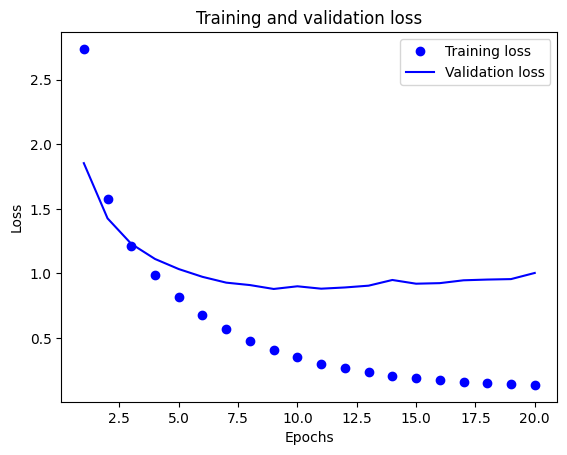

In [14]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

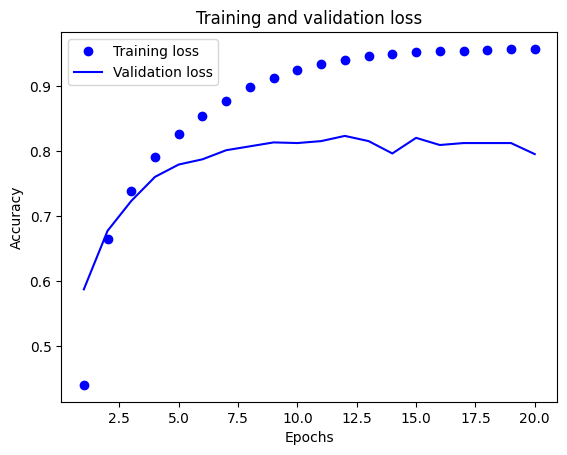

In [15]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training loss")
plt.plot(epochs, val_acc, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
model=keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results=model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 53ms/step - loss: 2.6150 - accuracy: 0.4516
Epoch 2/9
18/18 [==============================] - 1s 56ms/step - loss: 1.4990 - accuracy: 0.6788
Epoch 3/9
18/18 [==============================] - 1s 59ms/step - loss: 1.1507 - accuracy: 0.7566
Epoch 4/9
18/18 [==============================] - 1s 59ms/step - loss: 0.9320 - accuracy: 0.8042
Epoch 5/9
18/18 [==============================] - 1s 69ms/step - loss: 0.7687 - accuracy: 0.8343
Epoch 6/9
18/18 [==============================] - 2s 89ms/step - loss: 0.6343 - accuracy: 0.8634
Epoch 7/9
18/18 [==============================] - 1s 76ms/step - loss: 0.5244 - accuracy: 0.8868
Epoch 8/9
18/18 [==============================] - 1s 51ms/step - loss: 0.4374 - accuracy: 0.9041
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9078 - accuracy: 0.7965


In [17]:
results

[0.9077856540679932, 0.7965271472930908]